In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gr√°ficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Leer conjunto de datos y primer vistazo

In [200]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
df = pd.read_csv("data/mushrooms.csv")
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

### Exploraci√≥n de datos

In [201]:
# Descripci√≥n del conjunto de datos, est√°ndar
df.describe(include='all')

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [202]:
# Informaci√≥n sobre el tipo de datos de cada feature
print("--- Informaci√≥n de tipos de datos ---")
df.info()

--- Informaci√≥n de tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null

#### Calcular el n√∫mero de nulos de cada feature

In [203]:
# Contar los nulos por variable
print("--- Valores nulos por columna ---")
null_counts = df.isnull().sum()
print(null_counts)
if null_counts.sum() > 0:
    print("\nColumnas con valores nulos:")
    print(null_counts[null_counts > 0])
else:
    print("‚úì No hay valores nulos en el dataset")

--- Valores nulos por columna ---
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
‚úì No hay valores nulos en el dataset


#### Buscar valores extra√±os. Ver los valores √∫nicos en cada feature

In [204]:
unique_values = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].unique() for col in df.columns]
})
unique_values
unique_vals = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].unique() for col in df.columns]
})
unique_vals

features                              n_values
0                      class                                [p, e]
1                  cap-shape                    [x, b, s, f, k, c]
2                cap-surface                          [s, y, f, g]
3                  cap-color        [n, y, w, g, e, p, b, u, c, r]
4                    bruises                                [t, f]
5                       odor           [p, a, l, n, f, c, y, s, m]
6            gill-attachment                                [f, a]
7               gill-spacing                                [c, w]
8                  gill-size                                [n, b]
9                 gill-color  [k, n, g, p, w, h, u, e, b, r, y, o]
10               stalk-shape                                [e, t]
11                stalk-root                       [e, c, b, r, ?]
12  stalk-surface-above-ring                          [s, f, k, y]
13  stalk-surface-below-ring                          [s, f, y, k]
14    stalk-color-above-ring           [w, g, p, n, b, e, o, c, y]
15    stalk-color-below-ring           [w, p, g, b, n, e, y, o, c]
16                 veil-type                                   [p]
17                veil-color                          [w, n, o, y]
18               ring-number                             [o, t, n]
19                 ring-type                       [p, e, l, f, n]
20         spore-print-color           [k, n, u, h, w, r, o, y, b]
21                population                    [s, n, a, v, y, c]
22                   habitat                 [u, g, m, d, p, w, l]

In [205]:
# Obtener dataframe con features y sus valores √∫nicos
unique_values_info = []
for col in df.columns:
    unique_vals = df[col].unique()
    unique_values_info.append({
        'features': col,
        'n_values': len(unique_vals),
        'values': str(list(unique_vals)[:10])  # Mostrar solo los primeros 10
    })

unique_df = pd.DataFrame(unique_values_info)
print("--- Valores √∫nicos por feature ---")
unique_df[['features', 'n_values']]

--- Valores √∫nicos por feature ---


features  n_values
0                      class         2
1                  cap-shape         6
2                cap-surface         4
3                  cap-color        10
4                    bruises         2
5                       odor         9
6            gill-attachment         2
7               gill-spacing         2
8                  gill-size         2
9                 gill-color        12
10               stalk-shape         2
11                stalk-root         5
12  stalk-surface-above-ring         4
13  stalk-surface-below-ring         4
14    stalk-color-above-ring         9
15    stalk-color-below-ring         9
16                 veil-type         1
17                veil-color         4
18               ring-number         3
19                 ring-type         5
20         spore-print-color         9
21                population         6
22                   habitat         7

#### Tratar aquellos valores que entendamos que sean nulos

In [206]:
# Buscar valores que podr√≠an representar nulos (como '?')
print("--- Verificando valores extra√±os ---")
strange_values_found = False
for col in df.columns:
    unique_vals = df[col].unique()
    if '?' in unique_vals:
        count_question = (df[col] == '?').sum()
        print(f" '{col}' contiene {count_question} valores '?' (posibles nulos)")
        strange_values_found = True

if not strange_values_found:
    print("‚úì No se encontraron valores extra√±os aparentes")
    # Imputaciones: reemplazar '?' por moda o eliminar filas
    print("--- Tratamiento de valores faltantes ---")

    original_shape = df.shape
    
for col in df.columns:
    if '?' in df[col].values:
        print(f"Tratando '{col}'...")
        # Opci√≥n 1: Imputar con la moda
        df[col] = df[col].replace('?', np.nan)
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"  ‚Üí Imputado con moda: {mode_value}")

print(f"‚úì Dataset shape: {original_shape} ‚Üí {df.shape}")


--- Verificando valores extra√±os ---
 'stalk-root' contiene 2480 valores '?' (posibles nulos)
Tratando 'stalk-root'...
  ‚Üí Imputado con moda: b
‚úì Dataset shape: (8124, 22) ‚Üí (8124, 23)


#### Mirad cu√°ntos valores hay en cada feature, ¬øTodas las features aportan informaci√≥n? Si alguna no aporta informaci√≥n, eliminadla

In [207]:
# Eliminar features que no aportan informaci√≥n (solo un valor √∫nico)

print("--- Verificando features informativas ---")
single_value_cols = []
for col in df.columns:
    unique_count = df[col].nunique()
    if unique_count <= 1:
        single_value_cols.append(col)
        print(f"‚ö†Ô∏è  '{col}' tiene solo {unique_count} valor √∫nico")

if single_value_cols:
    df = df.drop(columns=single_value_cols)
    print(f"‚úì Eliminadas {len(single_value_cols)} columnas sin informaci√≥n")
else:
    print("‚úì Todas las features aportan informaci√≥n")

print(f"Forma final del dataset: {df.shape}")

--- Verificando features informativas ---
‚ö†Ô∏è  'veil-type' tiene solo 1 valor √∫nico
‚úì Eliminadas 1 columnas sin informaci√≥n
Forma final del dataset: (8124, 22)


#### Separar entre variables predictoras y variables a predecir

In [208]:
# La variable que trata de predecir este conjunto de datos es 'class' (poisonous)
target_col = 'class' if 'class' in df.columns else df.columns[0]
y = df[target_col]
X = df.drop(columns=[target_col])

print(f"Variable objetivo: {target_col}")
print(f"Variables predictoras: {X.shape[1]} features")
print(f"\n--- Distribuci√≥n de la variable objetivo ---")
print(y.value_counts())
print(f"\nPorcentajes:")
print(y.value_counts(normalize=True) * 100)

Variable objetivo: class
Variables predictoras: 21 features

--- Distribuci√≥n de la variable objetivo ---
class
e    4208
p    3916
Name: count, dtype: int64

Porcentajes:
class
e    51.797144
p    48.202856
Name: proportion, dtype: float64


#### Codificar correctamente las variables categ√≥ricas a num√©ricas

In [209]:
# One Hot Encoder
print("--- Codificaci√≥n de variables categ√≥ricas ---")
print(f"Features antes del encoding: {X.shape[1]}")

# Usar pandas get_dummies para One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"Features despu√©s del encoding: {X_encoded.shape[1]}")

# Codificar tambi√©n la variable objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\n--- Codificaci√≥n variable objetivo ---")
print(f"Mapeo: {dict(zip(le.classes_, le.transform(le.classes_)))}")


--- Codificaci√≥n de variables categ√≥ricas ---
Features antes del encoding: 21
Features despu√©s del encoding: 94

--- Codificaci√≥n variable objetivo ---
Mapeo: {'e': np.int64(0), 'p': np.int64(1)}


#### Train test split

In [210]:
# Clasificaci√≥n con Random Forest
# Divisi√≥n estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.33, random_state=42, stratify=y_encoded
)

print(f"‚úì Conjunto de entrenamiento: {X_train.shape}")
print(f"‚úì Conjunto de prueba: {X_test.shape}")
print(f"‚úì Distribuci√≥n balanceada mantenida")


‚úì Conjunto de entrenamiento: (5443, 94)
‚úì Conjunto de prueba: (2681, 94)
‚úì Distribuci√≥n balanceada mantenida


## PCA

Es un conjunto de datos del que a√∫n no hemos visto nada (no tenemos graficas) as√≠ que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que ser√°n **aquellas que retengan m√°s informaci√≥n**.

Varianza explicada por las 2 primeras componentes:
PC1: 0.180
PC2: 0.105
Total: 0.285


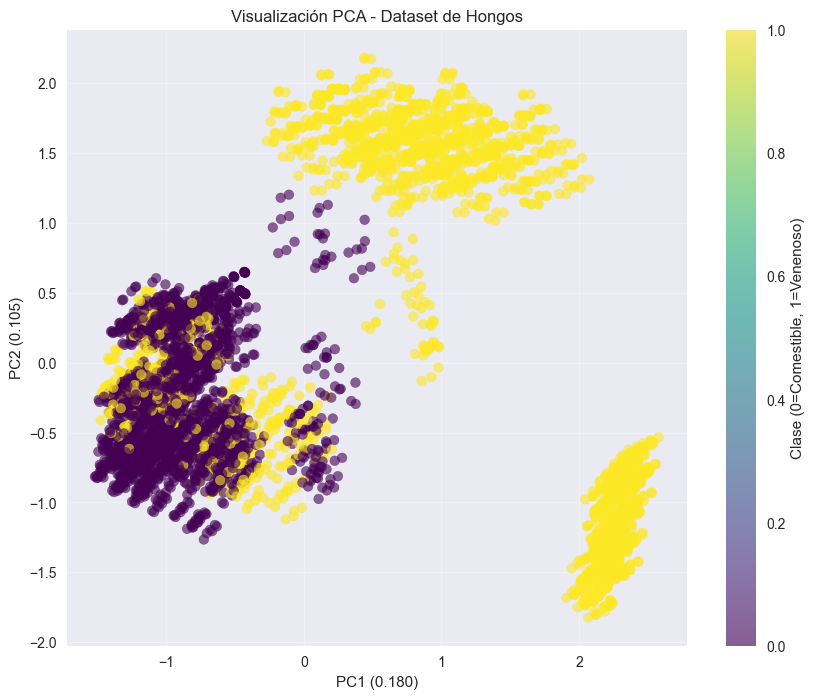

In [213]:
# PCA con 2 componentes para visualizaci√≥n
pca_2d = PCA(n_components=2, random_state=42)
X_train_pca_2d = pca_2d.fit_transform(X_train)

print(f"Varianza explicada por las 2 primeras componentes:")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.3f}")
print(f"Total: {pca_2d.explained_variance_ratio_.sum():.3f}")

# Representar en un scatterplot con colores de las etiquetas
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], 
                     c=y_train, alpha=0.6, cmap='viridis')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.3f})')
plt.title('Visualizaci√≥n PCA - Dataset de Hongos')
plt.colorbar(scatter, label='Clase (0=Comestible, 1=Venenoso)')
plt.grid(True, alpha=0.3)
plt.show()

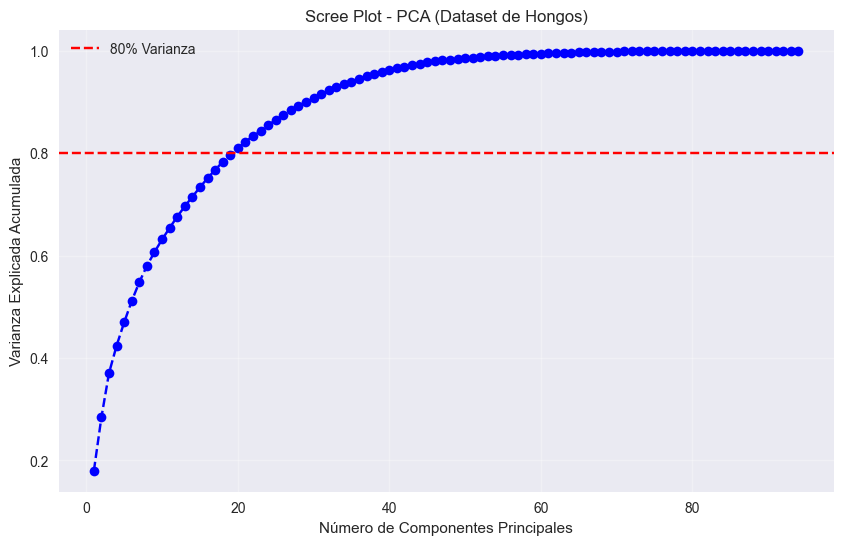

In [214]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Ajustar PCA con todos los componentes posibles
pca_full = PCA()
pca_full.fit(X_train)

# Calcular la varianza explicada acumulada
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Graficar Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o', linestyle='--', color='b')
plt.xlabel('N√∫mero de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree Plot - PCA (Dataset de Hongos)')
plt.grid(True, alpha=0.3)

# L√≠nea de referencia para 80%
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Varianza')
plt.legend()
plt.show()


#### ¬øQu√© muestra la gr√°fica?
Eje X: N√∫mero de Componentes Principales (PCs), del 1 al 90+.

Eje Y: Varianza Explicada Acumulada, es decir, cu√°nto de la informaci√≥n total del dataset original se conserva al usar un cierto n√∫mero de componentes principales.

L√≠nea Azul: Representa la varianza explicada acumulada por los componentes. A medida que se agregan m√°s componentes, la varianza explicada se incrementa hasta acercarse a 1 (100%).

L√≠nea Roja Discontinua: Representa un umbral del 80% de varianza explicada. Es un valor t√≠pico usado para decidir cu√°ntos componentes conservar.


### Optimizaci√≥n del n√∫mero de componentes PCA

--- Optimizaci√≥n PCA ---
Probando PCA con 2 a 50 componentes...
  n_components=10: accuracy=0.9989
  n_components=20: accuracy=1.0000
  n_components=30: accuracy=0.9996
  n_components=40: accuracy=1.0000


NameError: name 'accuracy_baseline' is not defined

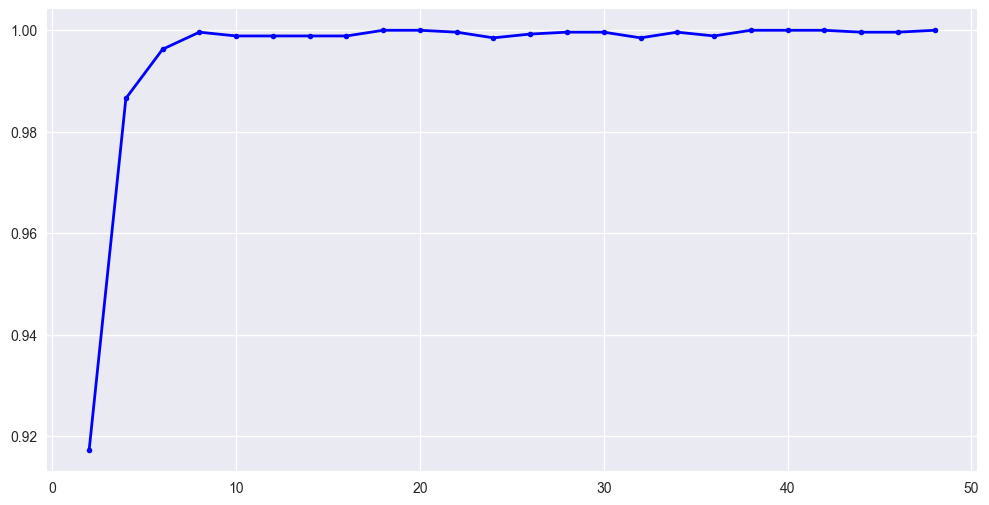

In [212]:
# Buscar n√∫mero √≥ptimo de componentes
print("--- Optimizaci√≥n PCA ---")
max_components = min(50, X_train.shape[1])  # Limitar para eficiencia
n_features = range(2, max_components, 2)
scores = []

print(f"Probando PCA con 2 a {max_components} componentes...")
for n in n_features:
    # PCA
    pca = PCA(n_components=n, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_test_pca)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
    if n % 10 == 0:
        print(f"  n_components={n}: accuracy={score:.4f}")

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(n_features, scores, 'bo-', linewidth=2, markersize=4)
plt.axhline(y=accuracy_baseline, color='r', linestyle='--', 
           label=f'Baseline: {accuracy_baseline:.4f}')
plt.xlabel('N√∫mero de Componentes PCA')
plt.ylabel('Accuracy')
plt.title('Optimizaci√≥n del N√∫mero de Componentes PCA')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Resultado √≥ptimo
optimal_n = n_features[np.argmax(scores)]
optimal_score = max(scores)
print(f"\n‚úì N√∫mero √≥ptimo de componentes: {optimal_n}")
print(f"‚úì Mejor accuracy: {optimal_score:.4f}")
print(f"‚úì Reducci√≥n dimensional: {X_train.shape[1]} ‚Üí {optimal_n}")
print(f"‚úì Porcentaje de reducci√≥n: {(1-optimal_n/X_train.shape[1])*100:.1f}%")

### Clasificador baseline

In [ ]:
# Entrenar Random Forest con todas las features
print("--- Clasificador Baseline (todas las features) ---")
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"‚úì Precisi√≥n con {X_train.shape[1]} features: {accuracy_baseline:.4f}")
print(f"‚úì Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_baseline))

--- Clasificador Baseline (todas las features) ---
‚úì Precisi√≥n con 94 features: 1.0000
‚úì Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       1.00      1.00      1.00      1292

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



## Clustering

--- Clustering con 20 componentes PCA ---
Evaluando diferentes valores de K...
K=2: Inercia=31346, Silhouette=0.198
K=3: Inercia=26448, Silhouette=0.229
K=4: Inercia=23233, Silhouette=0.239
K=5: Inercia=21009, Silhouette=0.258
K=6: Inercia=19281, Silhouette=0.280
K=7: Inercia=18449, Silhouette=0.271
K=8: Inercia=17127, Silhouette=0.299
K=9: Inercia=16289, Silhouette=0.307
K=10: Inercia=15890, Silhouette=0.276


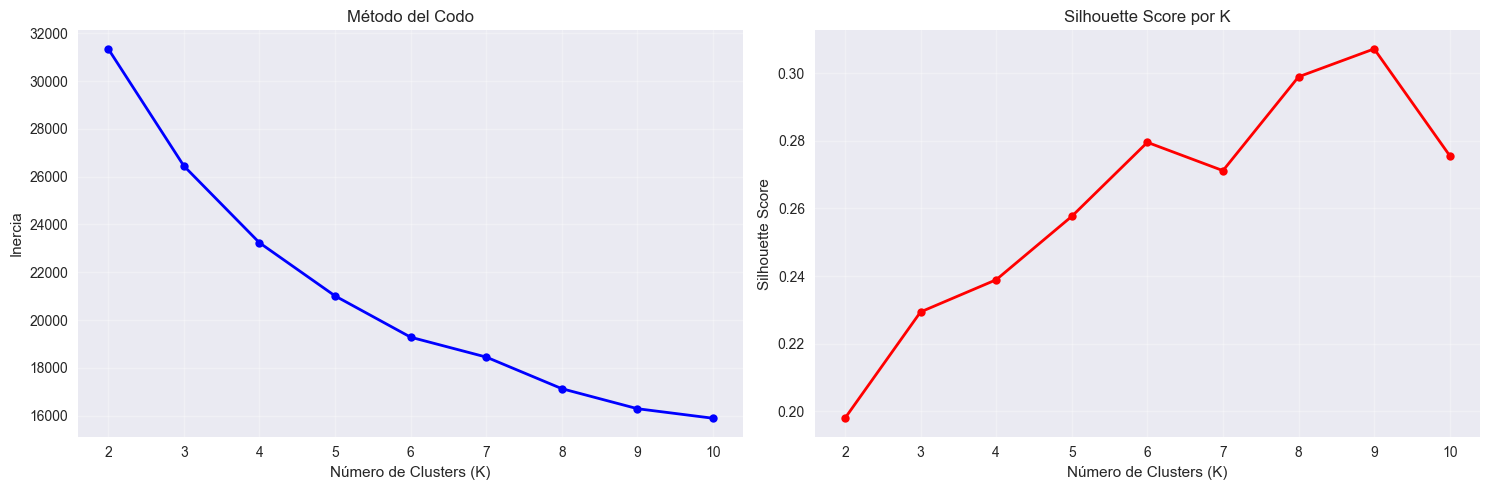


‚úì K √≥ptimo (Silhouette Score): 9


In [ ]:
### B√∫squeda del K √≥ptimo
# Preparar datos para clustering (usar PCA para reducir dimensionalidad)
pca_clustering = PCA(n_components=min(20, X_train.shape[1]), random_state=42)
X_clustering = pca_clustering.fit_transform(X_train)

print(f"--- Clustering con {X_clustering.shape[1]} componentes PCA ---")

# M√©todo del codo y Silhouette Score
k_values = range(2, 11)
inertias = []
silhouette_scores = []

print("Evaluando diferentes valores de K...")
for k in k_values:
    # K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_clustering)
    
    # M√©tricas
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_clustering, cluster_labels)
    
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    
    print(f"K={k}: Inercia={inertia:.0f}, Silhouette={sil_score:.3f}")

# Visualizaci√≥n
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# M√©todo del codo
ax1.plot(k_values, inertias, 'bo-', linewidth=2, markersize=6)
ax1.set_xlabel('N√∫mero de Clusters (K)')
ax1.set_ylabel('Inercia')
ax1.set_title('M√©todo del Codo')
ax1.grid(True, alpha=0.3)

# Silhouette Score
ax2.plot(k_values, silhouette_scores, 'ro-', linewidth=2, markersize=6)
ax2.set_xlabel('N√∫mero de Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por K')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# K √≥ptimo
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"\n‚úì K √≥ptimo (Silhouette Score): {optimal_k}")

--- K-means con K=9 ---
‚úì Clustering completado
‚úì Adjusted Rand Index: 0.270
‚úì Normalized Mutual Information: 0.424


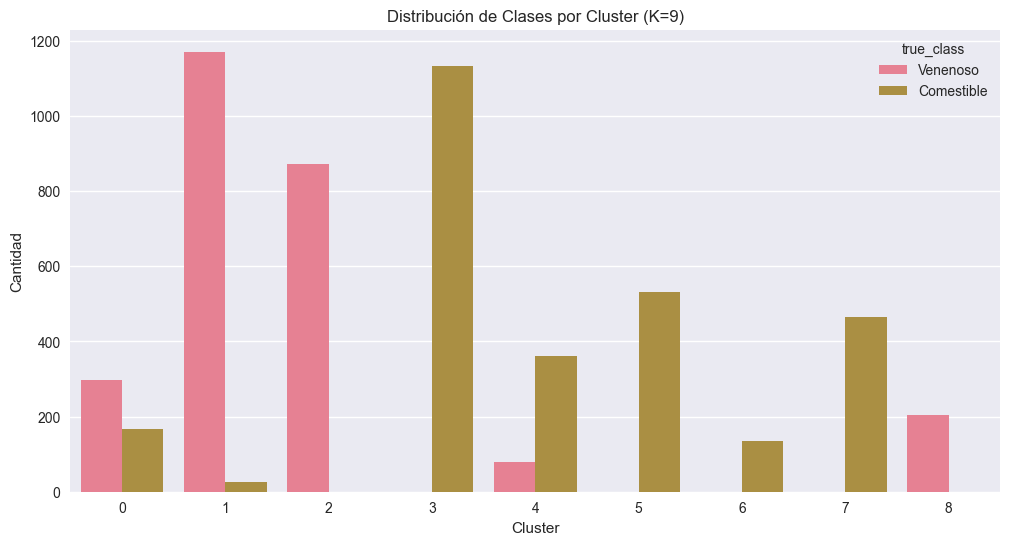


--- An√°lisis por cluster ---

Cluster 0 (n=466):
  Venenoso: 298 (63.9%)
  Comestible: 168 (36.1%)

Cluster 1 (n=1198):
  Venenoso: 1171 (97.7%)
  Comestible: 27 (2.3%)

Cluster 2 (n=872):
  Venenoso: 872 (100.0%)

Cluster 3 (n=1134):
  Comestible: 1134 (100.0%)

Cluster 4 (n=440):
  Comestible: 360 (81.8%)
  Venenoso: 80 (18.2%)

Cluster 5 (n=531):
  Comestible: 531 (100.0%)

Cluster 6 (n=135):
  Comestible: 135 (100.0%)

Cluster 7 (n=464):
  Comestible: 464 (100.0%)

Cluster 8 (n=203):
  Venenoso: 203 (100.0%)


In [ ]:
### Aplicar K-means con K √≥ptimo
# Entrenar K-means final
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_predictions = kmeans.fit_predict(X_clustering)

print(f"--- K-means con K={optimal_k} ---")
print(f"‚úì Clustering completado")

# Evaluar calidad del clustering
ari = adjusted_rand_score(y_train, cluster_predictions)
nmi = normalized_mutual_info_score(y_train, cluster_predictions)

print(f"‚úì Adjusted Rand Index: {ari:.3f}")
print(f"‚úì Normalized Mutual Information: {nmi:.3f}")

# Preparar datos para an√°lisis
cluster_analysis = pd.DataFrame({
    'cluster': cluster_predictions,
    'true_class': ['Venenoso' if x == 1 else 'Comestible' for x in y_train]
})

# Crear catplot para ver distribuci√≥n
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_analysis, x='cluster', hue='true_class')
plt.title(f'Distribuci√≥n de Clases por Cluster (K={optimal_k})')
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.show()

# An√°lisis detallado por cluster
print("\n--- An√°lisis por cluster ---")
for i in range(optimal_k):
    cluster_data = cluster_analysis[cluster_analysis['cluster'] == i]
    total = len(cluster_data)
    dist = cluster_data['true_class'].value_counts()
    
    print(f"\nCluster {i} (n={total}):")
    for class_name, count in dist.items():
        pct = (count/total)*100
        print(f"  {class_name}: {count} ({pct:.1f}%)")

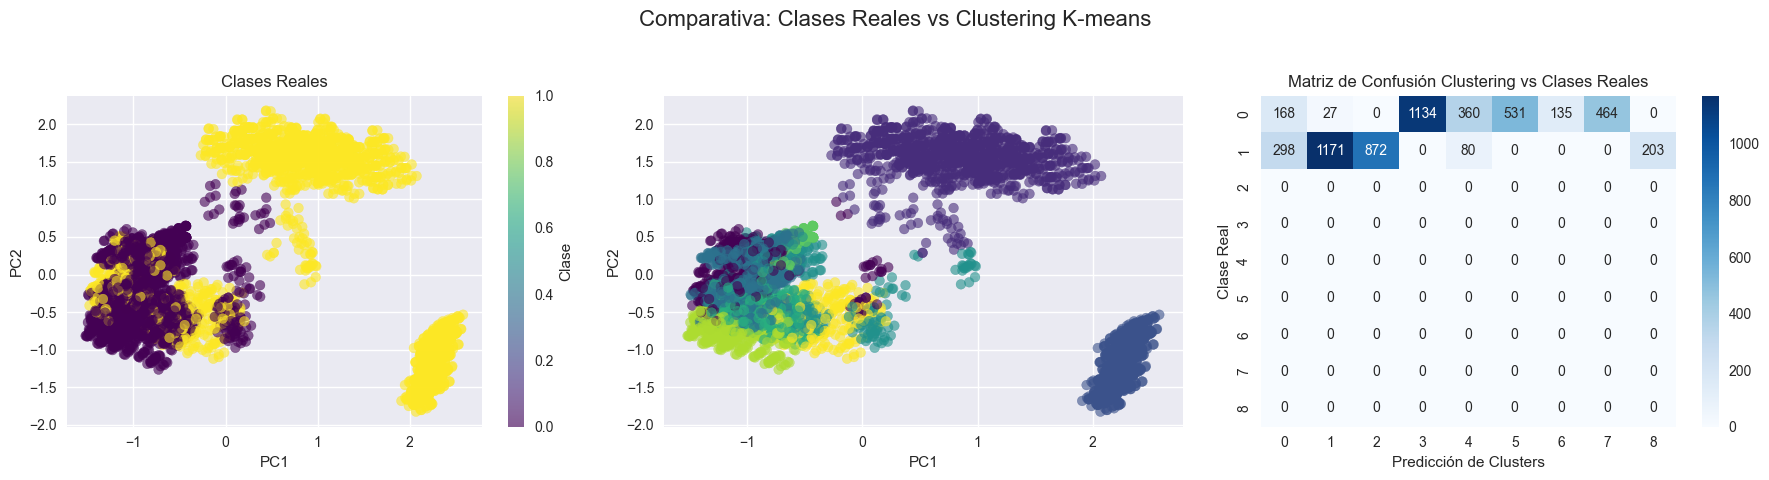

In [ ]:
### Visualizaci√≥n final comparativa
# Comparar clustering vs clasificaci√≥n real
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Usar PCA 2D para visualizaci√≥n
X_train_2d = pca_2d.transform(X_train)

# Gr√°fico 1: Clases reales
scatter1 = axes[0].scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                          c=y_train, alpha=0.6, cmap='viridis')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Clases Reales')
fig.colorbar(scatter1, ax=axes[0], label='Clase')

# Gr√°fico 2: Clusters K-means
scatter2 = axes[1].scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                          c=cluster_predictions, alpha=0.6, cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')   

# Gr√°fico 3: Matriz de confusi√≥n
cm = confusion_matrix(y_train, cluster_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_xlabel('Predicci√≥n de Clusters')
axes[2].set_ylabel('Clase Real')
axes[2].set_title('Matriz de Confusi√≥n Clustering vs Clases Reales')
plt.suptitle('Comparativa: Clases Reales vs Clustering K-means', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar t√≠tulo
plt.show()

In [ ]:
## Resumen y Conclusiones
print("=== RESUMEN FINAL DEL TALLER ===")
print(f"üìä Dataset: {df.shape[0]} muestras, {X_train.shape[1]} features finales")
print(f"üéØ Accuracy baseline (todas las features): {accuracy_baseline:.4f}")
print(f"üîÑ PCA √≥ptimo: {optimal_n} componentes ({(1-optimal_n/X_train.shape[1])*100:.1f}% reducci√≥n)")
print(f"üìà Accuracy con PCA: {optimal_score:.4f}")
print(f"üé≤ K-means √≥ptimo: {optimal_k} clusters")
print(f"ü§ù Concordancia clustering-clasificaci√≥n (ARI): {ari:.3f}")
print(f"üìä Informaci√≥n mutua (NMI): {nmi:.3f}")

print("\n=== INTERPRETACI√ìN DE RESULTADOS ===")

# Interpretaci√≥n autom√°tica
if accuracy_baseline > 0.95:
    print("‚úÖ Excelente separabilidad: Random Forest logra alta precisi√≥n")
else:
    print("‚ö†Ô∏è  Separabilidad moderada: Hay overlap entre clases")

if optimal_score >= accuracy_baseline * 0.95:
    print("‚úÖ PCA exitoso: Mantiene rendimiento con menos dimensiones")
else:
    print("‚ö†Ô∏è  PCA con p√©rdida: Reducci√≥n dimensional afecta el rendimiento")

if ari > 0.5:
    print("‚úÖ Clustering efectivo: K-means encuentra estructura similar a clases reales")
elif ari > 0.3:
    print("üî∂ Clustering parcial: Hay correspondencia moderada con clases reales")
else:
    print("‚ùå Clustering limitado: Poca correspondencia con clases reales")

print(f"\n=== VALOR PR√ÅCTICO ===")
print("üî¨ Este an√°lisis demuestra:")
print("   ‚Ä¢ PCA puede reducir dimensionalidad manteniendo informaci√≥n clave")
print("   ‚Ä¢ K-means puede descubrir patrones sin supervisi√≥n")
print("   ‚Ä¢ La estructura natural de los datos es interpretable")

if ari > 0.4:
    print("   ‚Ä¢ Los hongos tienen patrones intr√≠nsecos detectables sin etiquetas")
    print("   ‚Ä¢ Clustering podr√≠a usarse para clasificaci√≥n preliminar")

print("\nüéì ¬°Taller completado exitosamente!")


=== RESUMEN FINAL DEL TALLER ===
üìä Dataset: 8124 muestras, 94 features finales
üéØ Accuracy baseline (todas las features): 1.0000
üîÑ PCA √≥ptimo: 18 componentes (80.9% reducci√≥n)
üìà Accuracy con PCA: 1.0000
üé≤ K-means √≥ptimo: 9 clusters
ü§ù Concordancia clustering-clasificaci√≥n (ARI): 0.270
üìä Informaci√≥n mutua (NMI): 0.424

=== INTERPRETACI√ìN DE RESULTADOS ===
‚úÖ Excelente separabilidad: Random Forest logra alta precisi√≥n
‚úÖ PCA exitoso: Mantiene rendimiento con menos dimensiones
‚ùå Clustering limitado: Poca correspondencia con clases reales

=== VALOR PR√ÅCTICO ===
üî¨ Este an√°lisis demuestra:
   ‚Ä¢ PCA puede reducir dimensionalidad manteniendo informaci√≥n clave
   ‚Ä¢ K-means puede descubrir patrones sin supervisi√≥n
   ‚Ä¢ La estructura natural de los datos es interpretable

üéì ¬°Taller completado exitosamente!


In [ ]:
# Ejemplo: Importancia de features en PCA
print("\n--- Bonus: Features m√°s importantes en PC1 y PC2 ---")
feature_names = X_encoded.columns
pc1_importance = pd.Series(pca_2d.components_[0], index=feature_names).abs().sort_values(ascending=False)
pc2_importance = pd.Series(pca_2d.components_[1], index=feature_names).abs().sort_values(ascending=False)

print("Top 5 features en PC1:")
print(pc1_importance.head())
print("\nTop 5 features en PC2:")
print(pc2_importance.head())



--- Bonus: Features m√°s importantes en PC1 y PC2 ---
Top 5 features en PC1:
stalk-surface-above-ring_k    0.306059
stalk-surface-below-ring_k    0.299127
stalk-surface-above-ring_s    0.282729
ring-type_p                   0.280877
stalk-surface-below-ring_s    0.267812
dtype: float64

Top 5 features en PC2:
gill-size_n            0.371949
spore-print-color_w    0.354825
population_v           0.320014
stalk-shape_t          0.277708
spore-print-color_h    0.227718
dtype: float64


In [ ]:

### Ejercicios adicionales sugeridos

print("=== EJERCICIOS ADICIONALES RECOMENDADOS ===")
print("1. Probar otros algoritmos de clustering (DBSCAN, Hierarchical)")
print("2. Experimentar con diferentes m√©tricas de distancia")
print("3. Aplicar t-SNE para visualizaci√≥n alternativa")
print("4. Usar PCA para feature selection en lugar de reducci√≥n")
print("5. Implementar validaci√≥n cruzada en la optimizaci√≥n")
print("6. Analizar qu√© features originales contribuyen m√°s a cada PC")

# Ejemplo: Importancia de features en PCA
print("\n--- Bonus: Features m√°s importantes en PC1 y PC2 ---")
feature_names = X_encoded.columns
pc1_importance = pd.Series(pca_2d.components_[0], index=feature_names).abs().sort_values(ascending=False)
pc2_importance = pd.Series(pca_2d.components_[1], index=feature_names).abs().sort_values(ascending=False)

print("Top 5 features en PC1:")
print(pc1_importance.head())
print("\nTop 5 features en PC2:")
print(pc2_importance.head())

=== EJERCICIOS ADICIONALES RECOMENDADOS ===
1. Probar otros algoritmos de clustering (DBSCAN, Hierarchical)
2. Experimentar con diferentes m√©tricas de distancia
3. Aplicar t-SNE para visualizaci√≥n alternativa
4. Usar PCA para feature selection en lugar de reducci√≥n
5. Implementar validaci√≥n cruzada en la optimizaci√≥n
6. Analizar qu√© features originales contribuyen m√°s a cada PC

--- Bonus: Features m√°s importantes en PC1 y PC2 ---
Top 5 features en PC1:
stalk-surface-above-ring_k    0.306059
stalk-surface-below-ring_k    0.299127
stalk-surface-above-ring_s    0.282729
ring-type_p                   0.280877
stalk-surface-below-ring_s    0.267812
dtype: float64

Top 5 features en PC2:
gill-size_n            0.371949
spore-print-color_w    0.354825
population_v           0.320014
stalk-shape_t          0.277708
spore-print-color_h    0.227718
dtype: float64
